| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github repo for more information: https://github.com/edgi-govdata-archiving/ECHO-COVID19
#### The notebook was collaboratively authored by EDGI following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

# Examining Data from Multiple EPA Programs

This notebook examines data from the EPA's Enforcement and Compliance History Online (ECHO) database (https://echo.epa.gov/). It includes information from EPA's programs covering air quality (the Clean Air Act, or CAA), water quality (the Clean Water Act, or CWA), and hazardous and other waste processing (the Resource Recovery and Conservation Act, or RCRA). 

ECHO data is available for facility violations as well as inspections and enforcement actions by EPA, state and other agencies. The data made accessible here runs from the present day (the database is refreshed weekly) back to 2001, which is when the EPA believes the data to be most reliable. The notebook can be run to produce data for multiple Congressional Districts and states of your choosing. 

## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# **Let's begin!**

Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.

These first two cells give us access to some external Python code we will need.

### 1.  Bring in some code that is stored in a Github project.

In [1]:
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git
!git clone https://github.com/edgi-govdata-archiving/ECHO-Cross-Program.git -b allprograms-openhour
print("Done!")

Cloning into 'ECHO_modules'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 106 (delta 50), reused 75 (delta 29), pack-reused 0
Receiving objects: 100% (106/106), 49.36 KiB | 1.90 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Cloning into 'ECHO-Cross-Program'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 423 (delta 17), reused 20 (delta 9), pack-reused 392
Receiving objects: 100% (423/423), 4.24 MiB | 3.50 MiB/s, done.
Resolving deltas: 100% (253/253), done.
Done!


### 2.  Run a few Python modules.
These will help us process and visualize the different program data sets later.

In [2]:
%run ECHO_modules/DataSet.py
%run ECHO-Cross-Program/utilities.py
%run ECHO_modules/make_data_sets.py
print("Done!")

/Users/enost/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Done!


### 3.  This cell contains the parameters of the notebook run.  You can change the (state, CD) pairs to run the notebook for multiple congressional districts in multiple states.  After setting the (state, CD) pairs you want, you can instruct the notebook to Run All and it will step through all of the remaining cells.  You can then come back and examine the results.

In [40]:
region_type = 'Congressional District'
state_cds = [ ('NJ', 6)] #, ('NY', 9), ('OR', 2)
# Change this^! For example, instead of running New Jersey's 6th Congressional ('NJ', 6) you could do Wisconsin's 2nd ('WI', 2)
# See here: https://www.govtrack.us/congress/members/map
data_set_list = ['RCRA Violations', 'RCRA Inspections', 'RCRA Penalties', 'CAA Enforcements',
                 'CAA Violations', 'CAA Inspections', 'CAA Penalties', 'Greenhouse Gas Emissions', 
                 'CWA Violations', 'CWA Inspections', 'CWA Penalties', ]

### 4. This cell makes the data sets and stores the results for each of them from the database.  
This may take some time if you are looking at multiple congressional districts.

In [41]:
data_sets=make_data_sets( data_set_list )
print( "Congressional District data sets:")
for state, cd in state_cds:
    for ds_key, data_set in data_sets.items():
        print( state + '-' + str(cd) + ' - ' + ds_key )
        data_set.store_results( region_type=region_type, region_value=cd, state=state )

print( "State data sets:")
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique
for state in states:
    for ds_key, data_set in data_sets.items():
        print( state + ' - ' + ds_key )
        data_set.store_results( region_type='State', region_value=None, state=state )

Congressional District data sets:
NJ-6 - RCRA Violations
1640 program records were found
NJ-6 - RCRA Inspections
6594 program records were found
NJ-6 - RCRA Penalties
1419 program records were found
NJ-6 - CAA Inspections
473 program records were found
NJ-6 - CAA Enforcements
76 program records were found
NJ-6 - CAA Violations
241 program records were found
NJ-6 - CAA Penalties
740 program records were found
NJ-6 - Greenhouse Gas Emissions
244 program records were found
NJ-6 - CWA Violations
10942 program records were found
NJ-6 - CWA Inspections
827 program records were found
NJ-6 - CWA Penalties
58 program records were found
State data sets:
NJ - RCRA Violations
19549 program records were found
NJ - RCRA Inspections
74290 program records were found
NJ - RCRA Penalties
16621 program records were found
NJ - CAA Inspections
4221 program records were found
NJ - CAA Enforcements
475 program records were found
NJ - CAA Violations
2084 program records were found
NJ - CAA Penalties
7750 prog

In [ ]:
# You do not need to run this cell!
# Development - save the data so we can read it again locally (quickly) without 
# going to the database
# states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

# for state, cd in state_cds:
#     for ds_key, data_set in data_sets.items():
#        write_dataset( data_set.results[(region_type, cd, state)].dataframe, 
#                    ds_key, region_type, state, cd )
# for state in states:
#     for ds_key, data_set in data_sets.items():
#         write_dataset( data_set.results[('State', None, state)].dataframe, 
#                    ds_key, 'State', state, None )


### 5. This cell will generate a chart for each data set and each (state, CD) pair.

RCRA Violations
RCRA Inspections
RCRA Penalties
CAA Inspections
CAA Enforcements
CAA Violations
CAA Penalties
Greenhouse Gas Emissions
CWA Violations
CWA Inspections
CWA Penalties


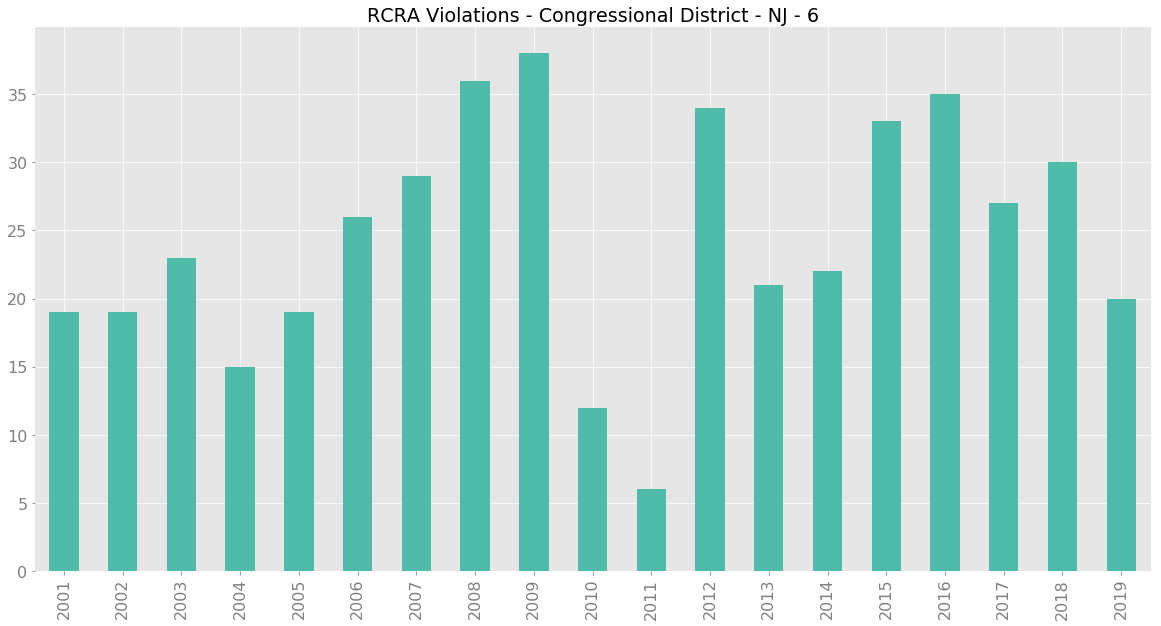

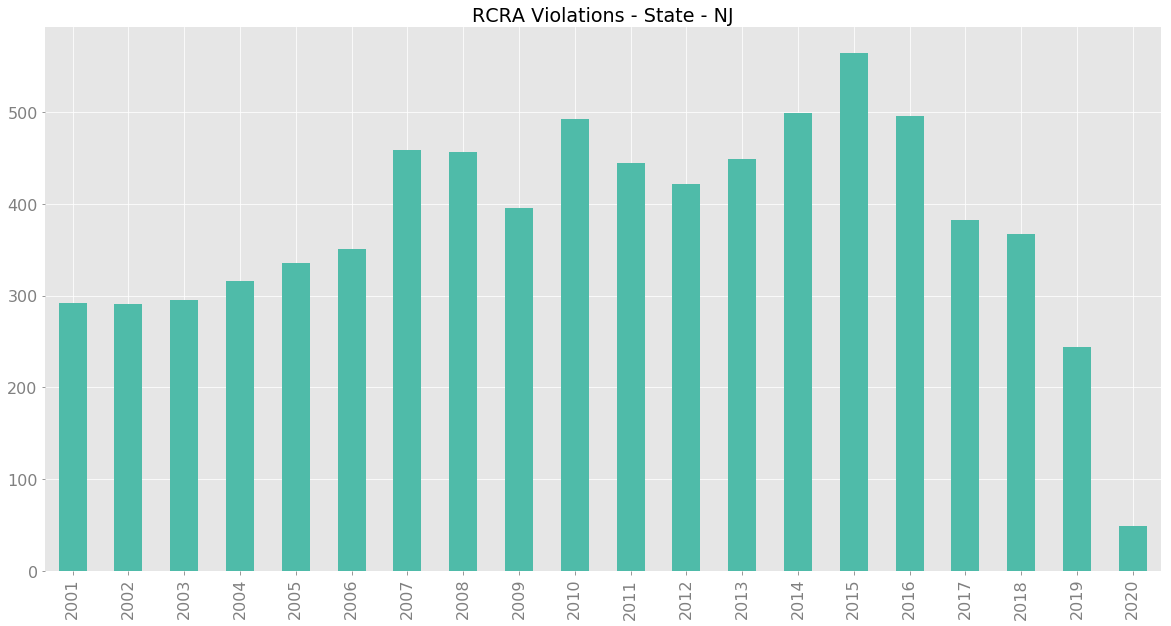

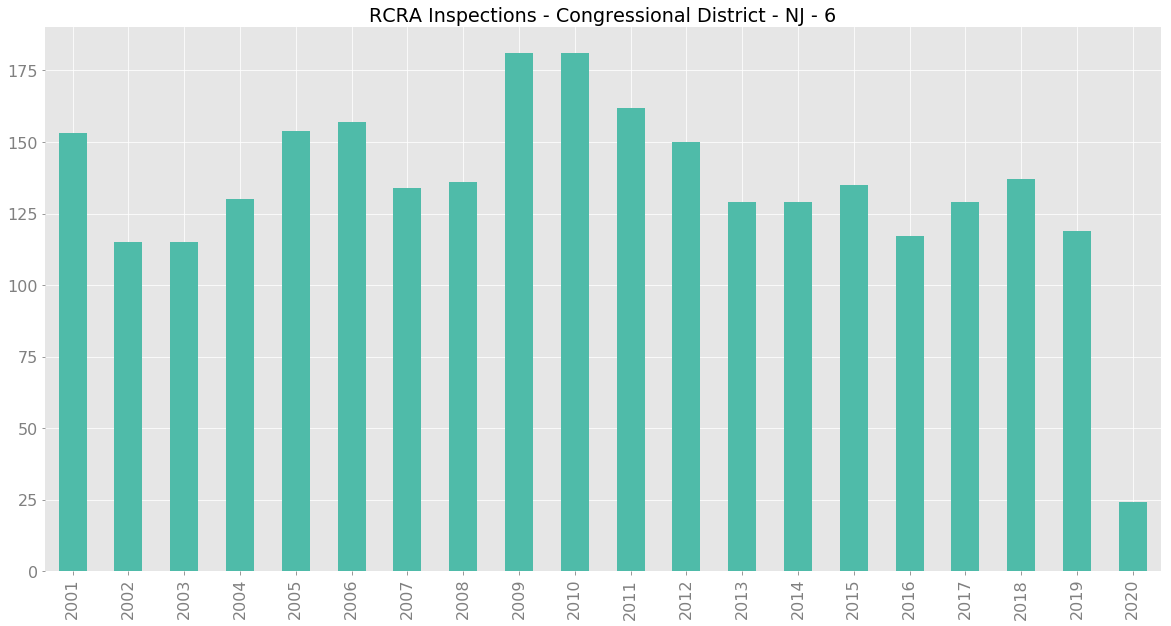

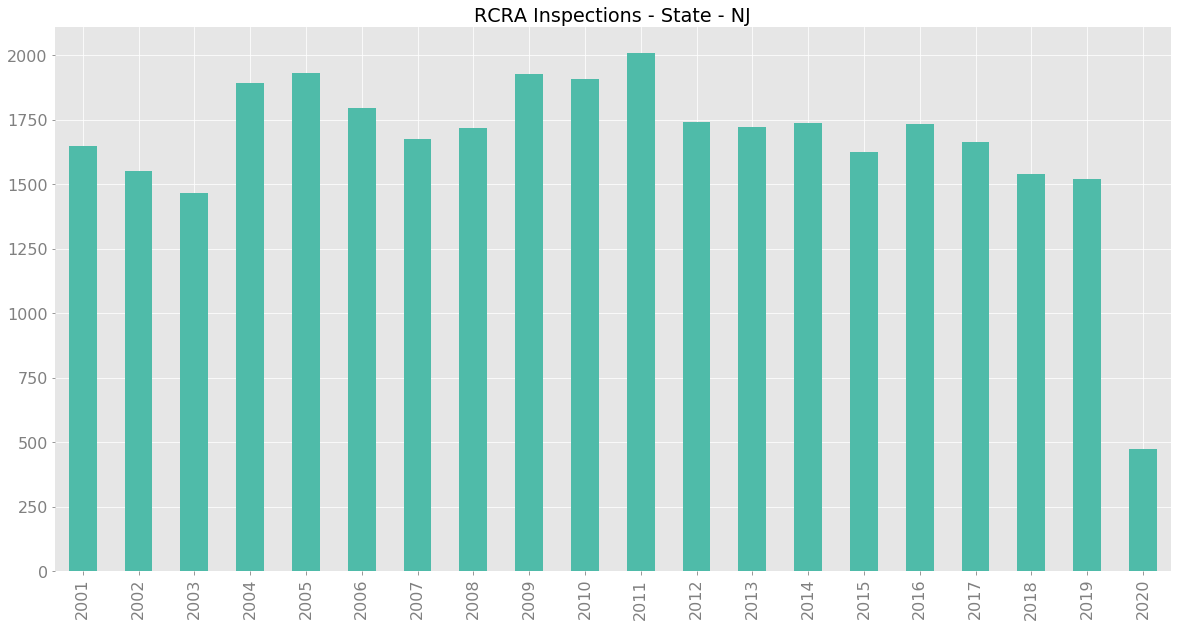

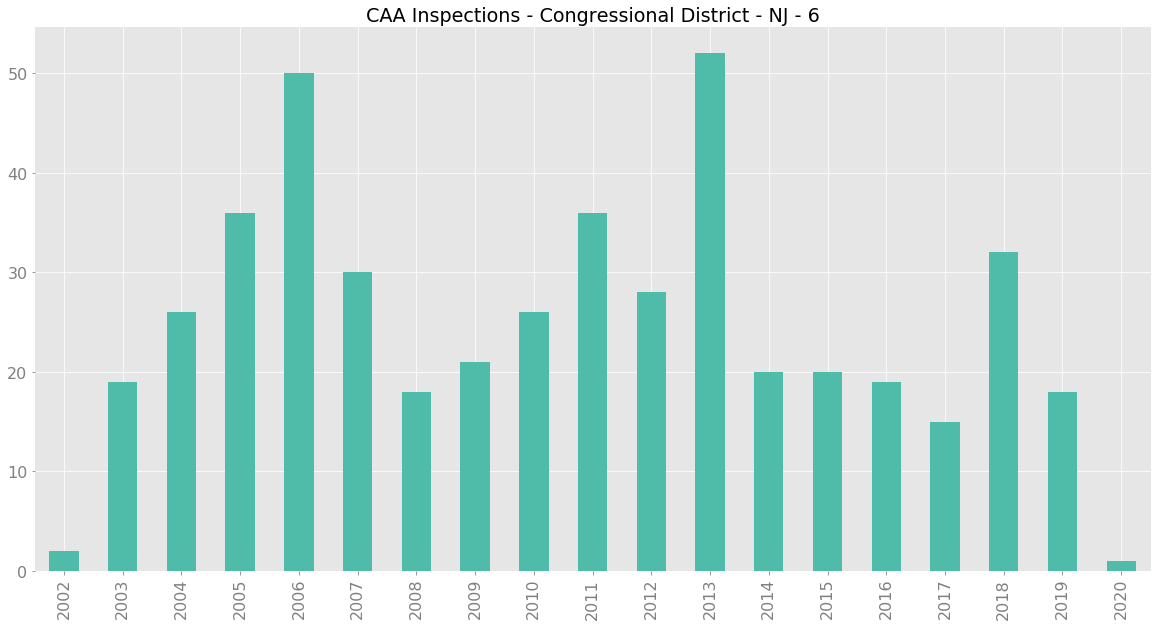

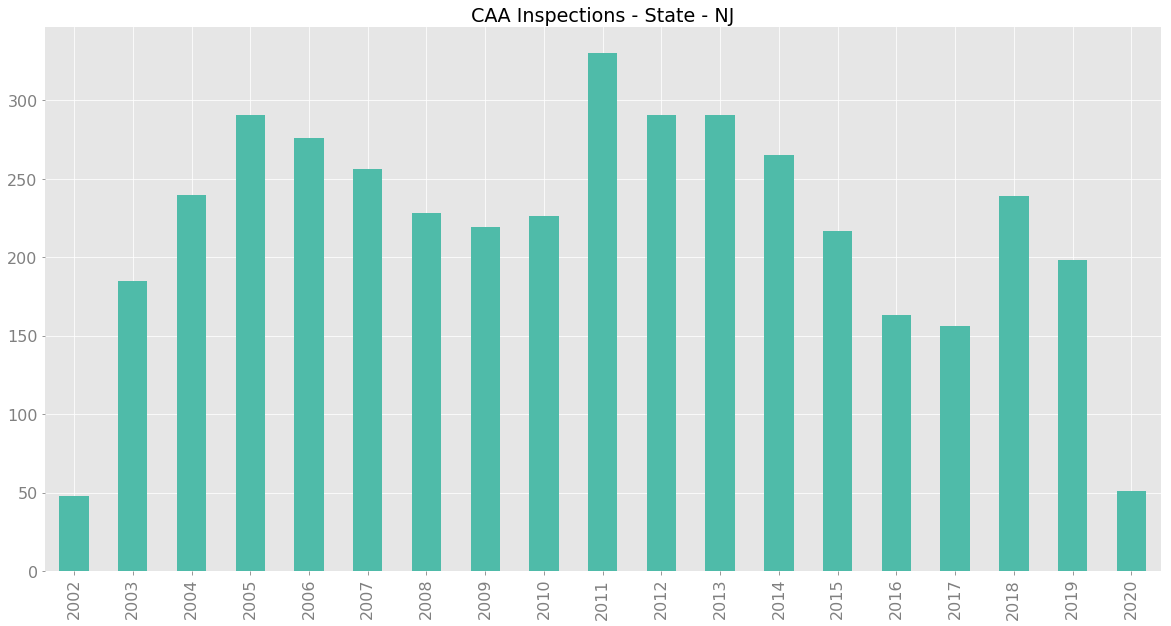

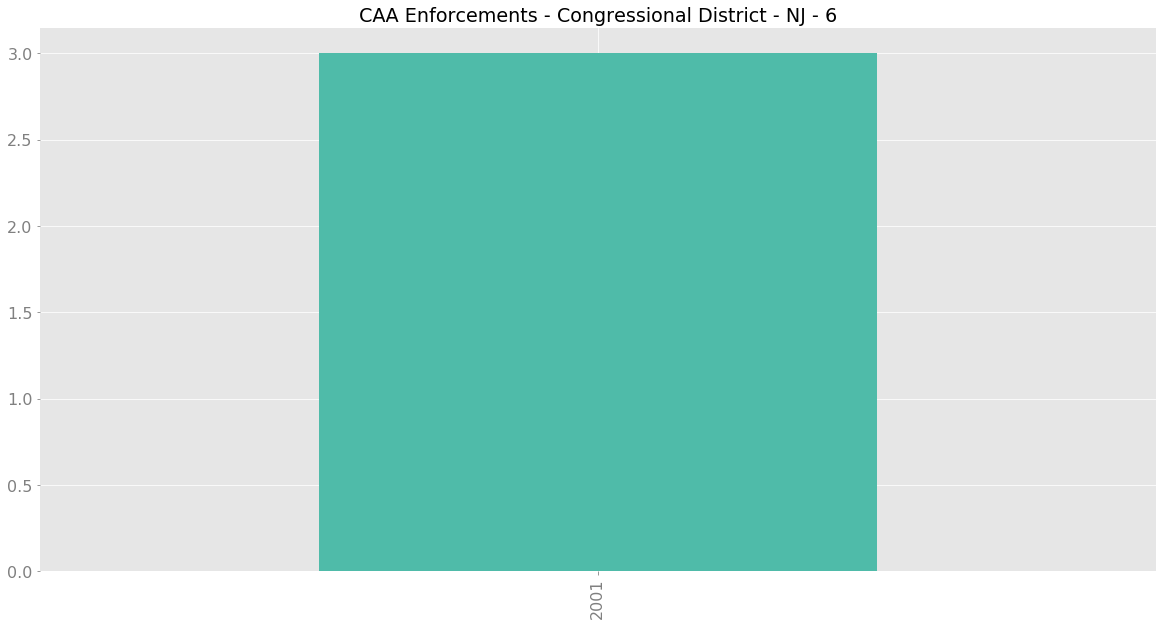

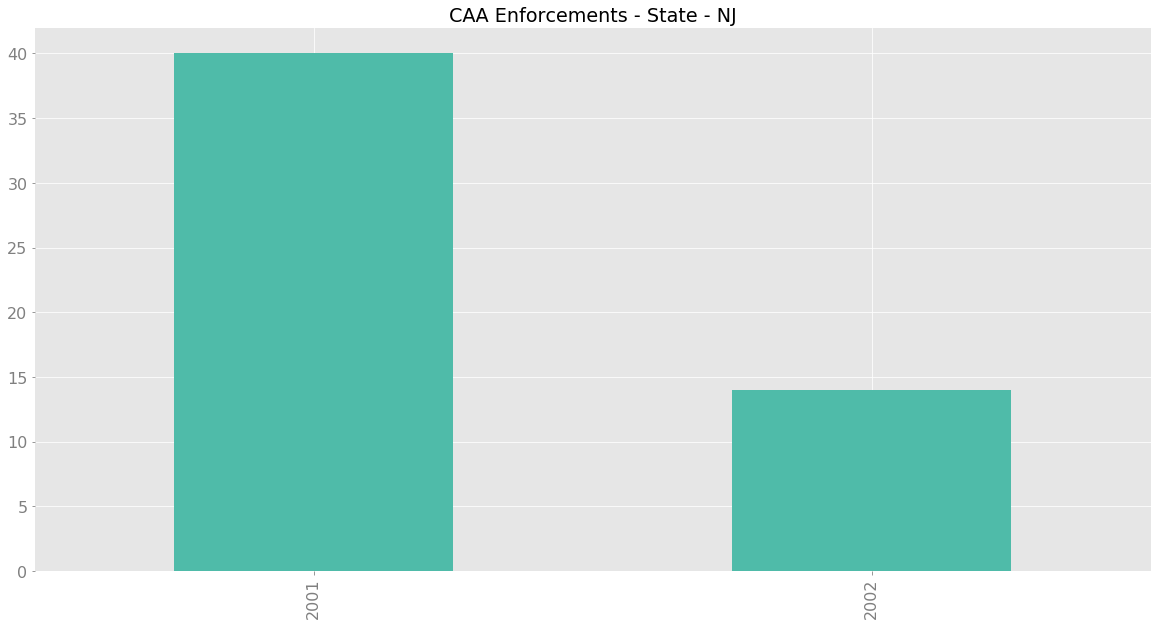

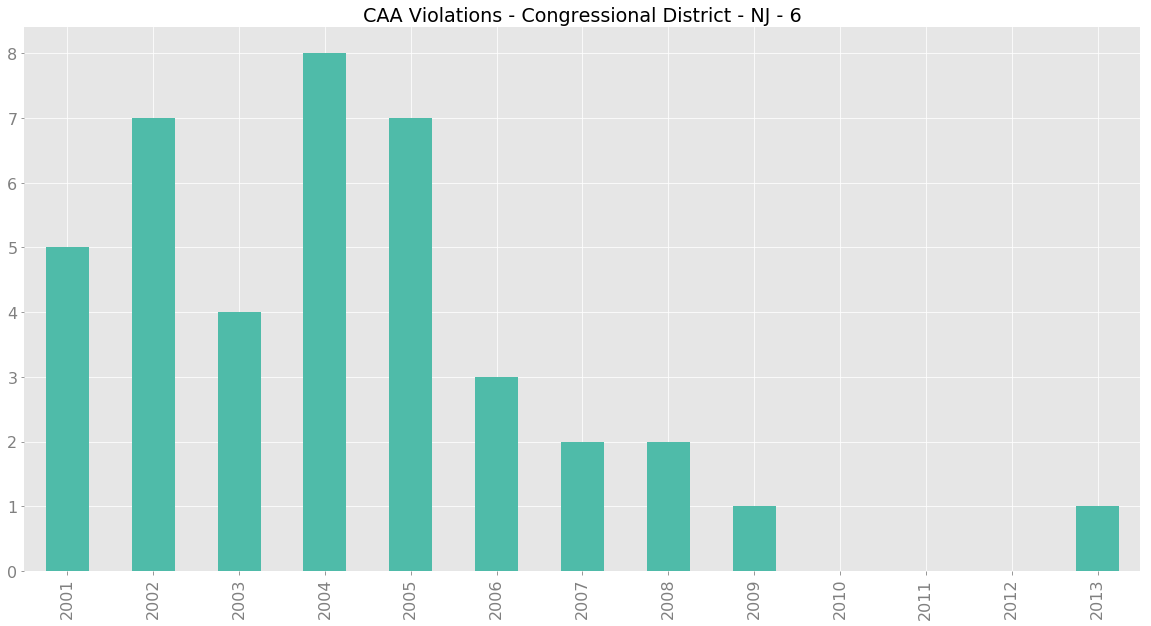

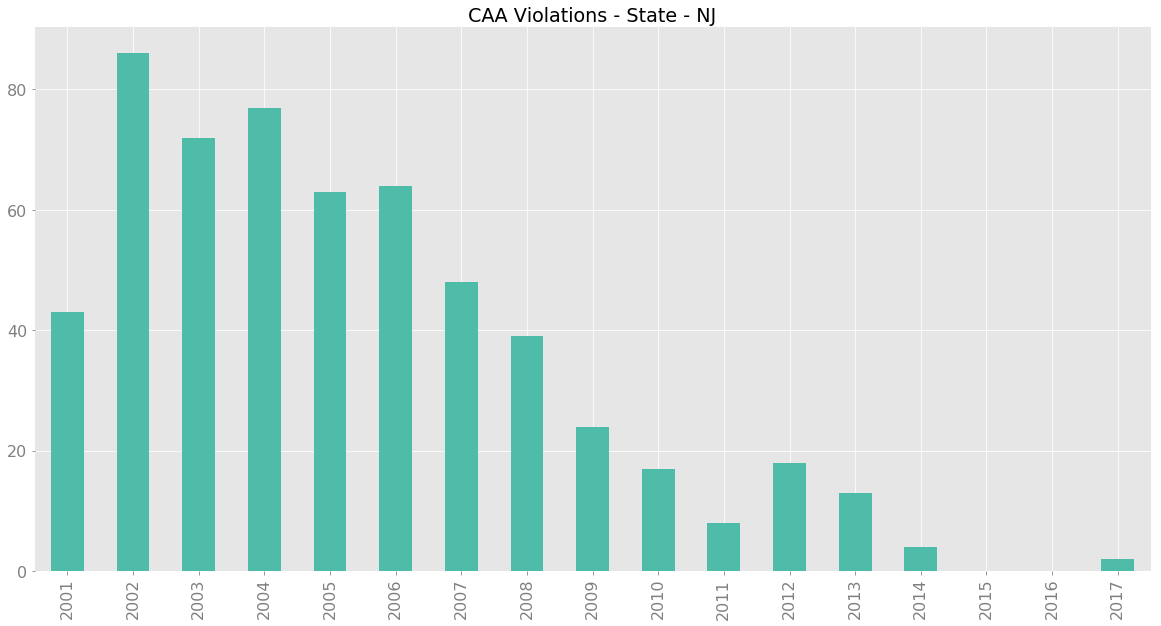

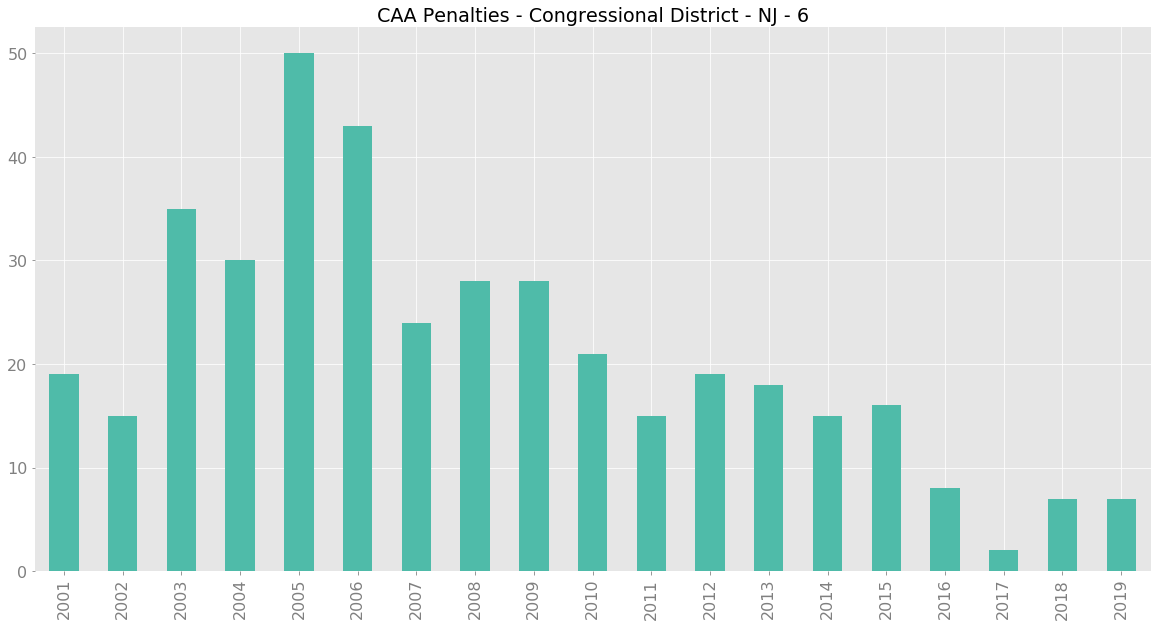

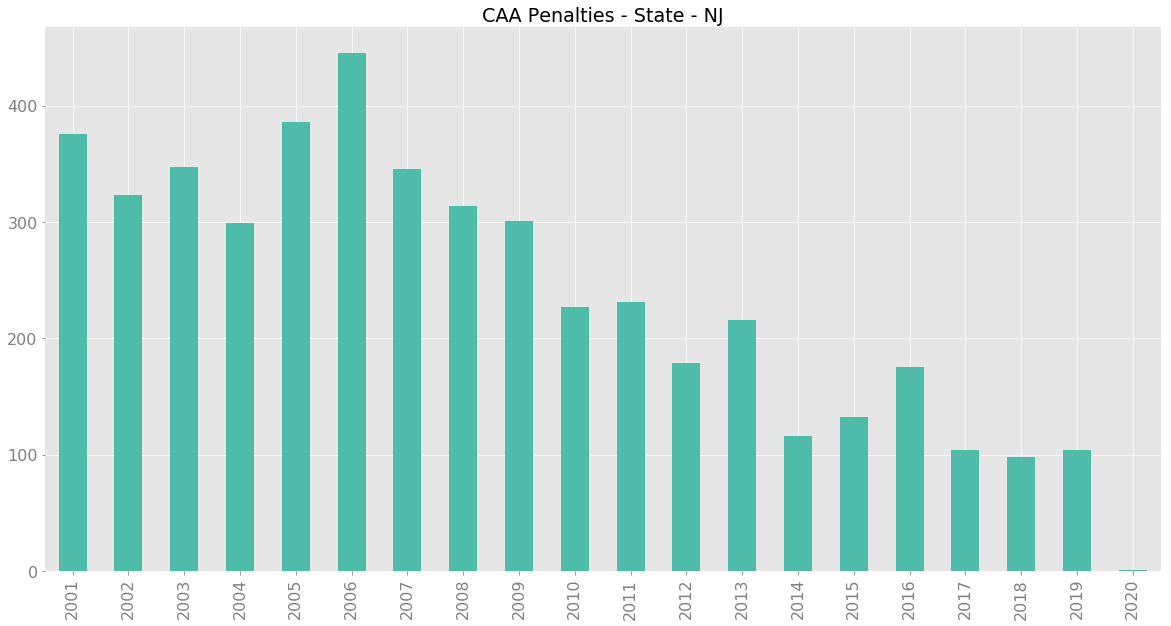

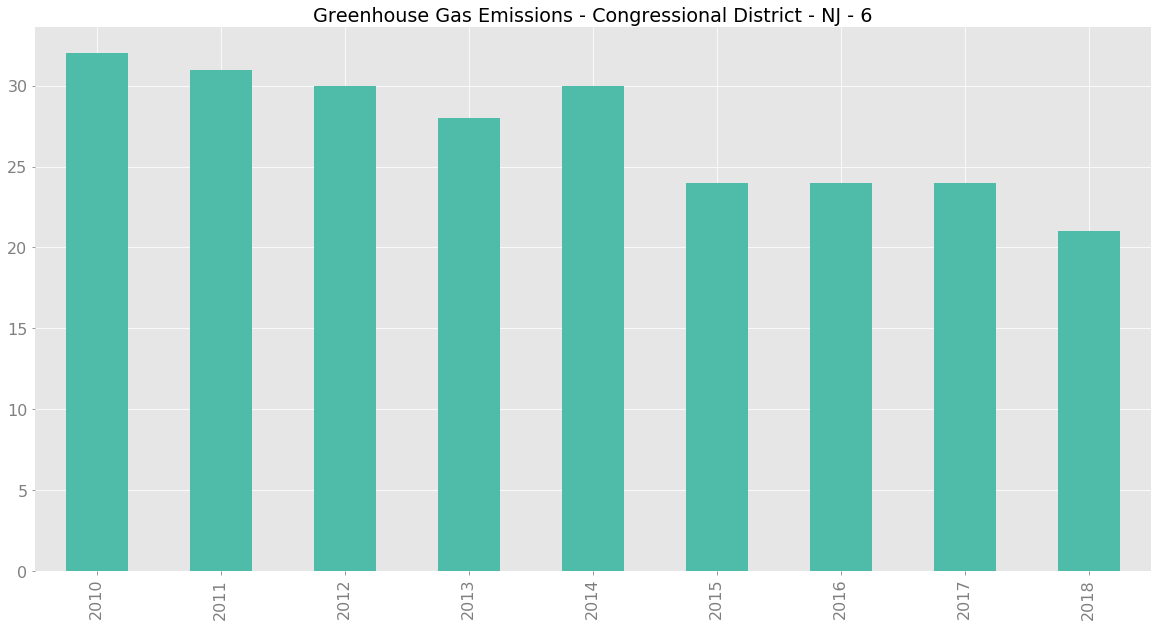

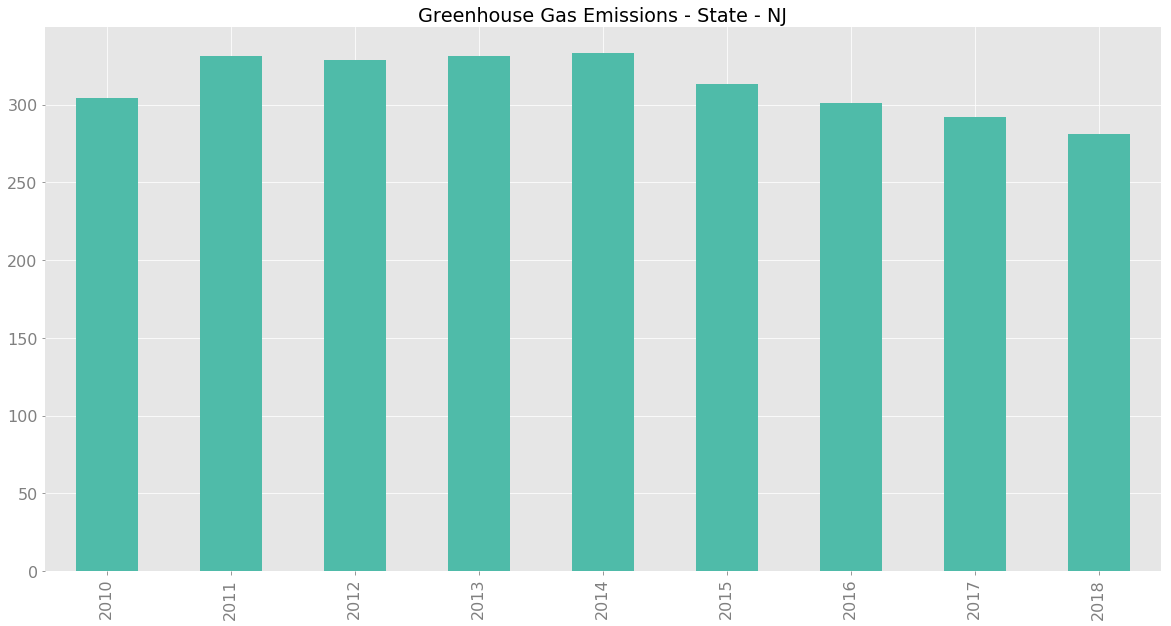

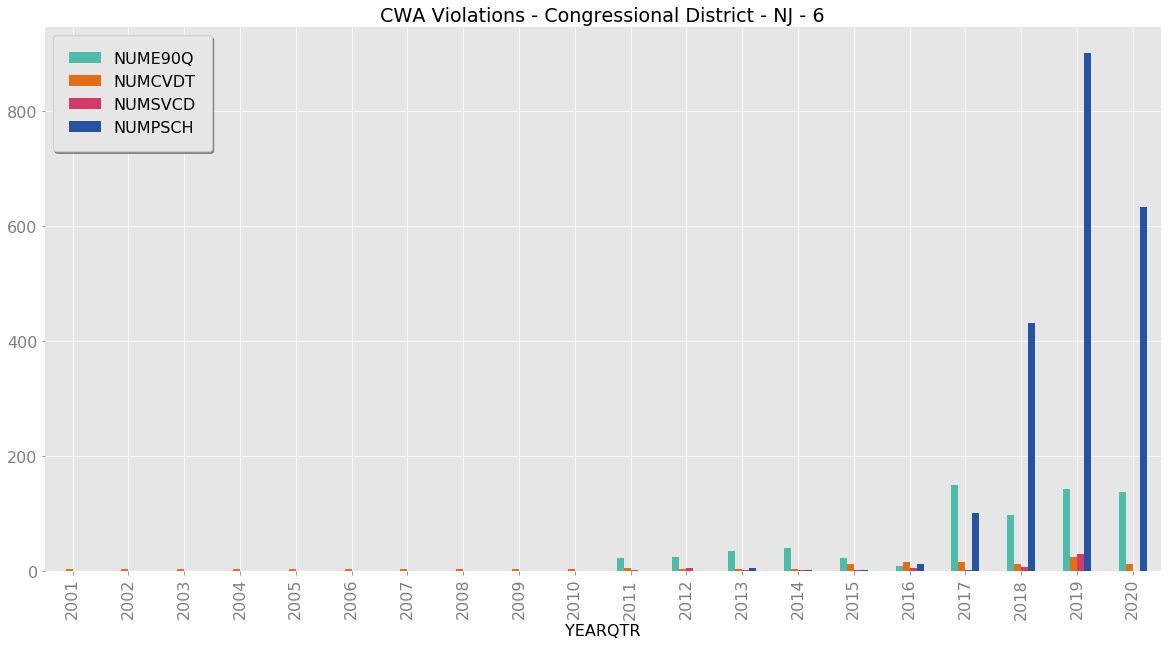

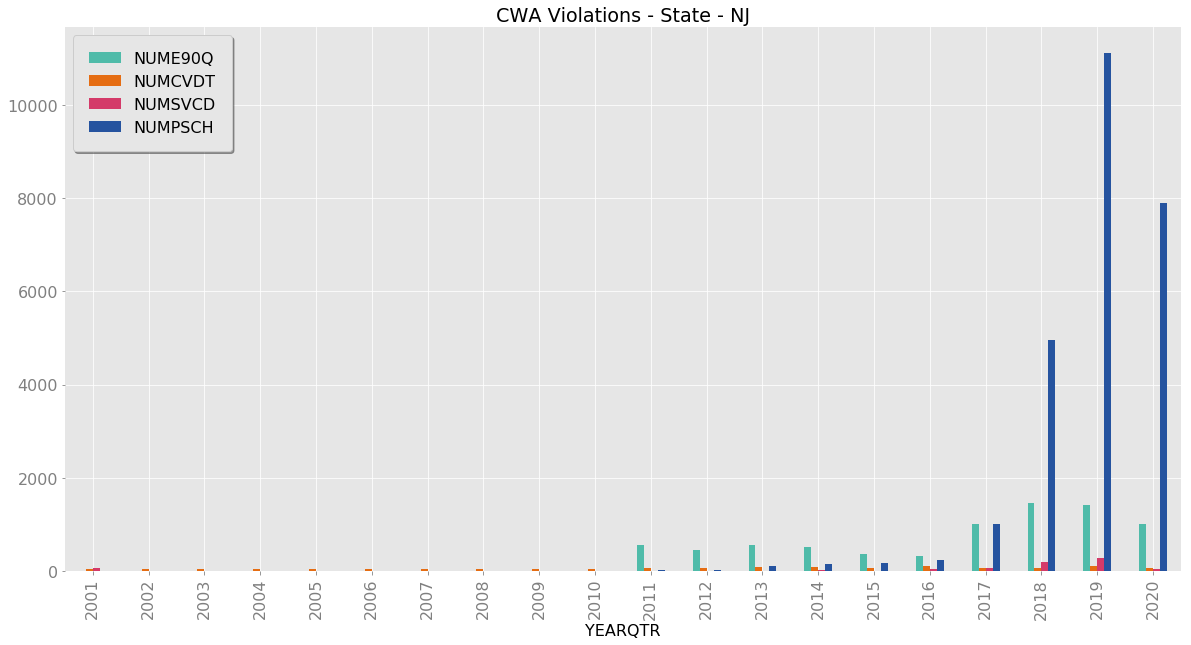

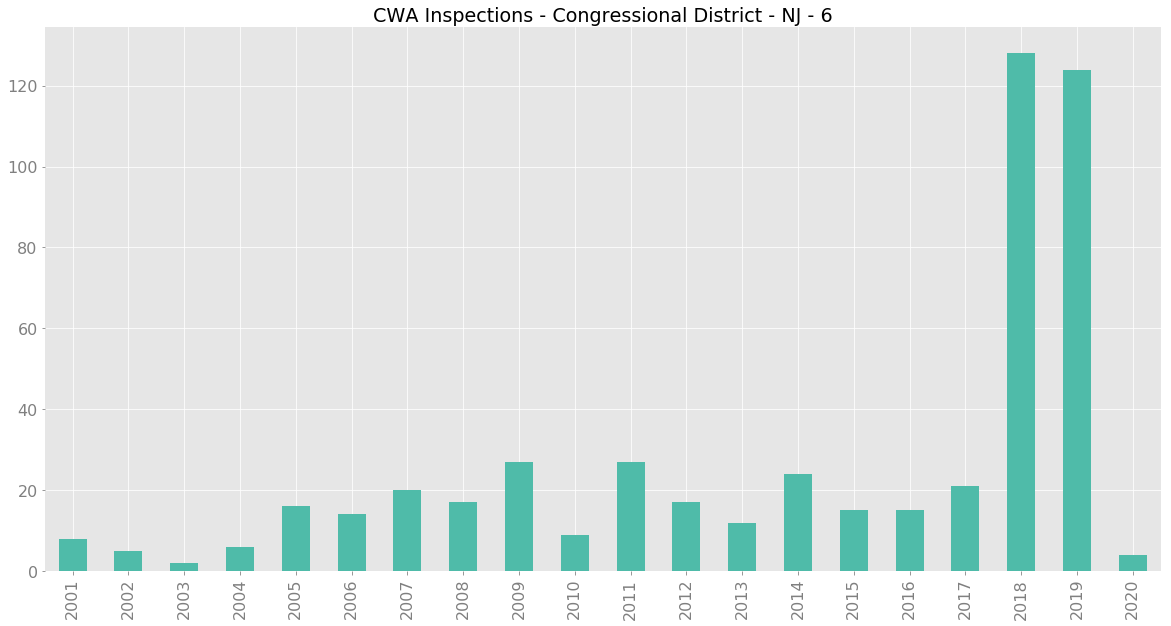

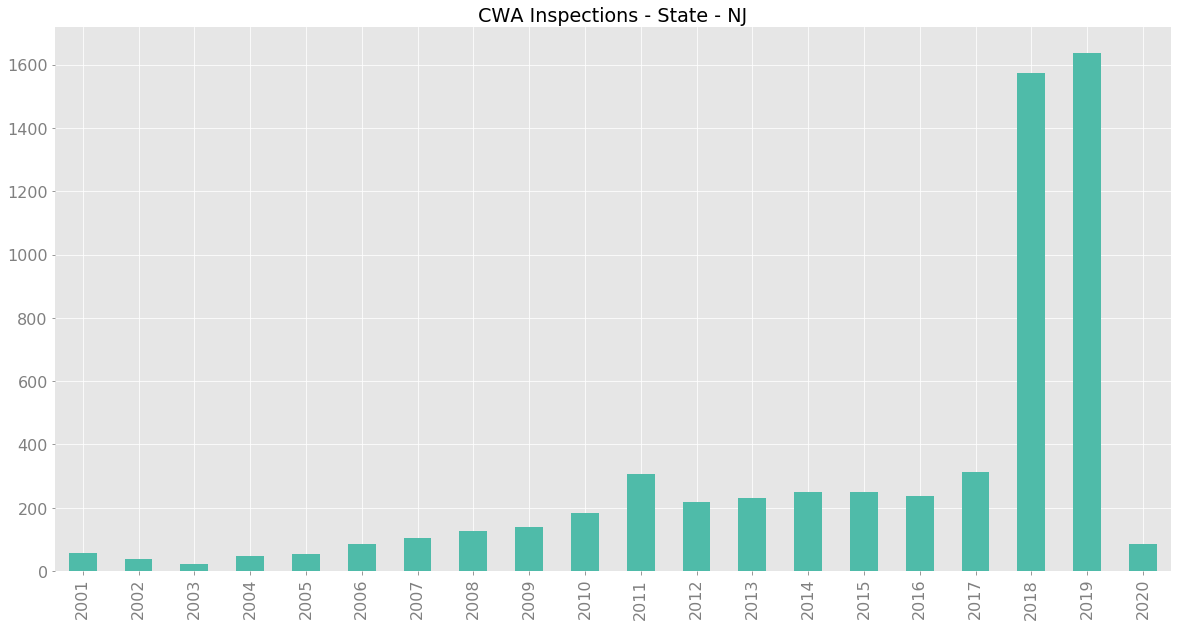

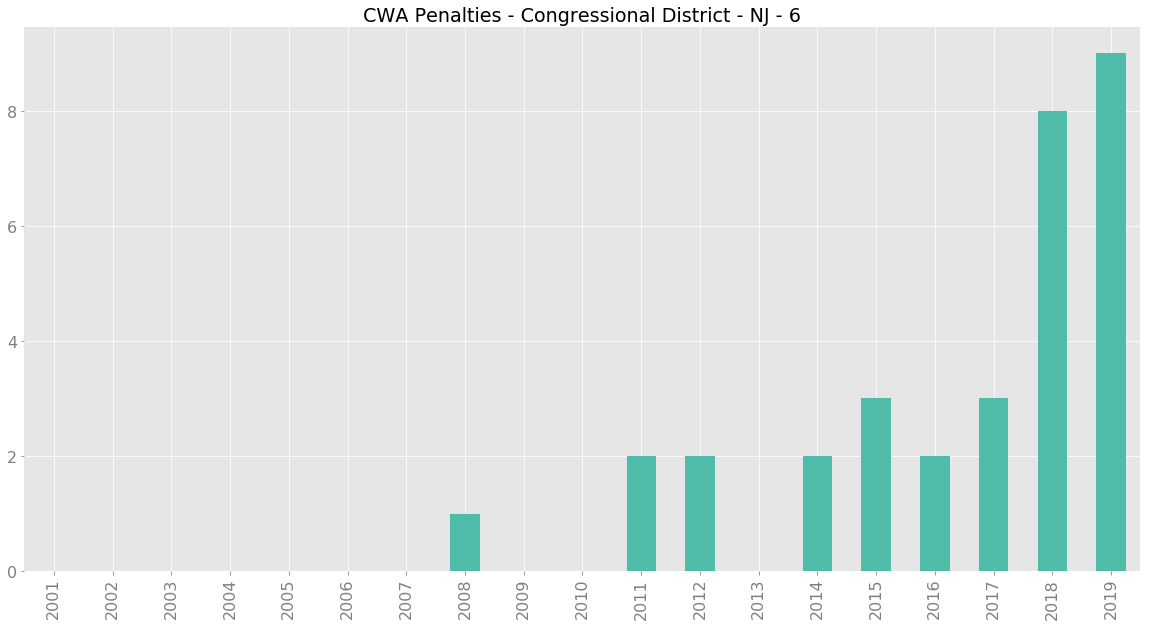

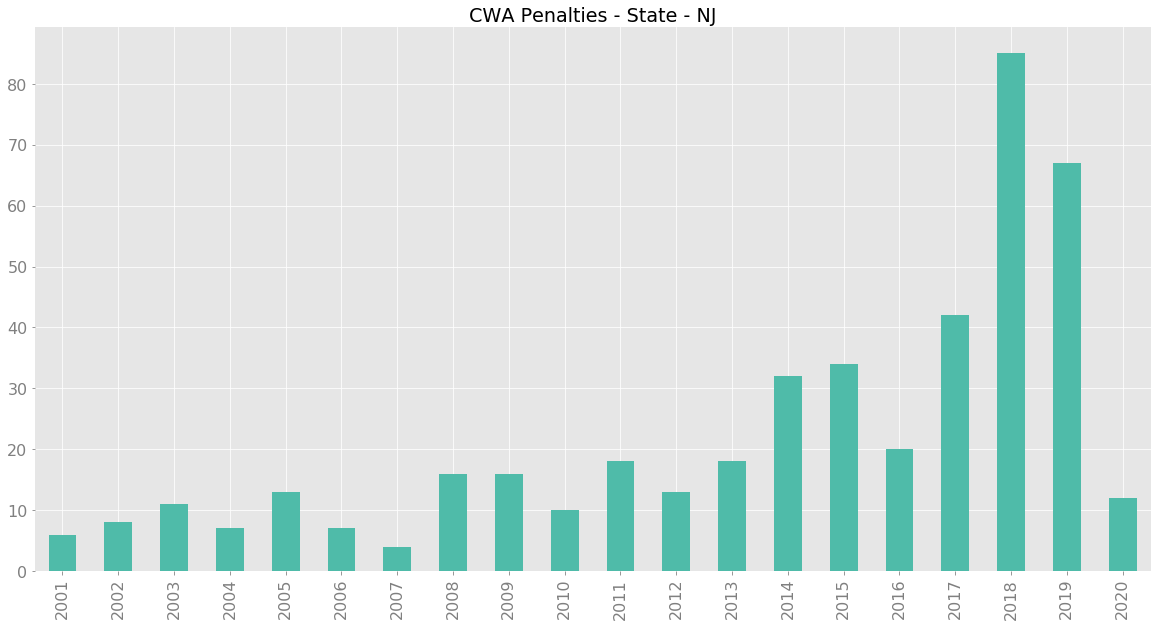

In [43]:
for ds_key, data_set in data_sets.items():
    print( ds_key )
    if ( ds_key != 'RCRA Penalties' ):
        data_set.show_charts()

### 6. Get the State data for comparisons

In [44]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique
state_echo_data = {}
state_echo_active = {}
for state in states:
    state_echo_data[state] = read_file( 'ECHO_EXPORTER', 'State', state, None )
    if ( state_echo_data[state] is None ):
        sql = 'select * from "ECHO_EXPORTER" where "FAC_STATE" = \'{}\''.format( state )
        state_echo_data[state] = get_data( sql, 'REGISTRY_ID' )
        write_dataset( state_echo_data[state], 'ECHO_EXPORTER', 'State', state, None )
    state_echo_active[state] = state_echo_data[state].loc[state_echo_data[state]['FAC_ACTIVE_FLAG']=='Y']
    print( 'There are {} active facilities in {}.'.format( 
        str(state_echo_active[state].shape[0]), state))

/Users/enost/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (5,20,74,119) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Wrote CSVs/ECHO_EXPORTER-NJ-State.csv
There are 27591 active facilities in NJ.


### 7. Number of currently active facilities regulated in CAA, CWA, RCRRA, GHGRP

In [45]:
def program_count( echo_data, program, flag, state, cd ):
    count = echo_data.loc[echo_data[flag]=='Y'].shape[0]
    print( 'There are {} active facilities in {} CD {} tracked under {}.'.format( 
        str( count ), state, cd, program))
    return count
    
cd_echo_data = {}
cd_echo_active = {}
for state, cd in state_cds:
    rowdata = []    
    cd_echo_data[(state,cd)] = state_echo_data[state].loc[state_echo_data[state]['FAC_DERIVED_CD113'] == cd]
    cd_echo_active[(state,cd)] = cd_echo_data[(state,cd)].loc[cd_echo_data[(state,cd)]['FAC_ACTIVE_FLAG']=='Y']
    rowdata.append( ['CAA', program_count( cd_echo_active[(state,cd)], 'CAA', 'AIR_FLAG', state, cd)] )
    rowdata.append( ['CWA', program_count( cd_echo_active[(state,cd)], 'CWA', 'NPDES_FLAG', state, cd)] )
    rowdata.append( ['RCRA', program_count( cd_echo_active[(state,cd)], 'RCRA', 'RCRA_FLAG', state, cd)] )
    rowdata.append( ['GHG', program_count( cd_echo_active[(state,cd)], 'GHG', 'GHG_FLAG', state, cd)] )
    filename = make_filename( 'active-facilities_All_pg3', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Count']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        writer.writerows( rowdata ) 
        print( "Wrote {}".format( filename ))     

There are 453 active facilities in NJ CD 6 tracked under CAA.
There are 604 active facilities in NJ CD 6 tracked under CWA.
There are 984 active facilities in NJ CD 6 tracked under RCRA.
There are 12 active facilities in NJ CD 6 tracked under GHG.
Wrote active-facilities_All_pg3_NJ-6-082520.csv


### 8. Map all currently active facilities in each district

In [48]:
cd_echo_active[(state, cd)]

,FAC_NAME,FAC_STREET,FAC_CITY,FAC_STATE,FAC_ZIP,FAC_COUNTY,FAC_FIPS_CODE,FAC_EPA_REGION,FAC_INDIAN_CNTRY_FLG,FAC_FEDERAL_FLG,...,FAC_DATE_LAST_INSPECTION_EPA,FAC_DATE_LAST_INSPECTION_STATE,FAC_DATE_LAST_FORMAL_ACT_EPA,FAC_DATE_LAST_FORMAL_ACT_ST,FAC_DATE_LAST_INFORMAL_ACT_EPA,FAC_DATE_LAST_INFORMAL_ACT_ST,FAC_FEDERAL_AGENCY,TRI_REPORTER,FAC_IMP_WATER_FLG,EJSCREEN_FLAG_US
REGISTRY_ID,,,,,,,,,,,,,,,,,,,,,
110002375493,VERIZON BUSINESS (CRTANJ),1400 FEDERAL BLVD,CARTERET,NJ,7008,MIDDLESEX,34023.0,2.0,N,NaN,...,NaN,06/04/2019,NaN,NaN,NaN,08/25/2015,NaN,NaN,NaN,Y
110004251522,WEST VIRGINIA PAINT CO,75 CUTTER DOCK RD,WOODBRIDGE,NJ,7095,MIDDLESEX,34023.0,2.0,N,NaN,...,NaN,10/25/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
110001528080,EASTERN STEEL BARREL CORPORATION,4100 NEW BRUNSWICK AVENUE,PISCATAWAY,NJ,8854,MIDDLESEX,34023.0,2.0,N,NaN,...,NaN,NaN,NaN,NaN,05/10/1984,NaN,NaN,Y,NaN,Y
110015668204,NEW JERSEY TURNPIKE AUTHORITY,BORDENTOWN TPKE,SAYREVILLE,NJ,8872,MIDDLESEX,34023.0,2.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
110058235422,STOROPACK,87 SUNFIELD AVE,EDISON,NJ,8837,MIDDLESEX,34023.0,2.0,N,NaN,...,12/22/2016,09/18/2015,NaN,10/13/2015,NaN,12/19/2019,NaN,NaN,NaN,Y
110014481042,DUPONT CARTERET,ROOSEVELT & INDUSTRIAL AVE,CARTERET,NJ,7008,MIDDLESEX,34023.0,2.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,11/09/1995,NaN,NaN,NaN,Y
110037430072,PREVOST,201 SOUTH AVE,SOUTH PLAINFIELD,NJ,7080,MIDDLESEX,34023.0,2.0,N,NaN,...,NaN,12/10/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
110070221118,ETHEL ROAD SUBDIVISION,100 & 106 ETHEL ROAD,EDISON TWP,NJ,8817,MIDDLESEX,34023.0,2.0,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
110028960738,NEW JERSEY TURNPIKE AUTH EDISON S/A 10-S,NEW JERSEY TPKE M P 929,WOODBRIDGE,NJ,7095,MIDDLESEX,34023.0,2.0,N,NaN,...,NaN,08/31/1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [50]:
for state, cd in state_cds:
    print( 'Map for {} CD {}'.format( state, cd ))
    this_cd = cd_echo_active[(state, cd)]
    #map_data = this_cd.loc[(this_cd['AIR_FLAG']=="Y") | (this_cd['NPDES_FLAG']=="Y")| (this_cd['RCRA_FLAG']=="Y")| (this_cd['GHG_FLAG']=="Y")]
    m = mapper(this_cd)
    display( m )

Map for NJ CD 6


### 9. Number of recurring violations - total facilities with 3+ quarters out of the last 12 in non-compliance, by each program

In [ ]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

def get_rowdata( df, field, flag ):
    count_viol = df.loc[((df[field].str.count("S") + 
                df[field].str.count("V")) >= 3)].shape[0]
    fraction_viol = count_viol/df.loc[df[flag]=='Y'].shape[0]
    print( "    {} facility quarterly violations in the past 3 years".format( count_viol ))
    print( "    {:.2%} of active facilities with violations in the past 3 years".format( 
           fraction_viol ))
    return (count_viol, fraction_viol * 100.)

rowdata_state = {}
for state in states:
    print( "State: {}".format( state ))
    print( "  CAA")
    rowdata_state[state] = []
    rd = get_rowdata( state_echo_data[state], 'CAA_3YR_COMPL_QTRS_HISTORY', 'AIR_FLAG')
    rowdata_state[state].append([ 'CAA', state, '', rd[0], rd[1]])
    print( "  CWA")
    rd = get_rowdata( state_echo_data[state], 'CWA_13QTRS_COMPL_HISTORY', 'NPDES_FLAG')
    rowdata_state[state].append([ 'CWA', state, '', rd[0], rd[1]])
    print( "  RCRA")
    rd = get_rowdata( state_echo_data[state], 'RCRA_3YR_COMPL_QTRS_HISTORY', 'RCRA_FLAG')
    rowdata_state[state].append([ 'RCRA', state, '', rd[0], rd[1]])

for state, cd in state_cds:
    rowdata_cd = []
    print( "{} - CD {}".format( state, cd ))
    print( "  CAA")
    rd = get_rowdata( cd_echo_data[(state,cd)], 'CAA_3YR_COMPL_QTRS_HISTORY', 'AIR_FLAG')
    rowdata_cd.append([ 'CAA', state, cd, rd[0], rd[1]])
    print( "  CWA")
    rd = get_rowdata( cd_echo_data[(state,cd)], 'CWA_13QTRS_COMPL_HISTORY', 'NPDES_FLAG')
    rowdata_cd.append([ 'CWA', state, cd, rd[0], rd[1]])
    print( "  RCRA")
    rd = get_rowdata( cd_echo_data[(state,cd)], 'RCRA_3YR_COMPL_QTRS_HISTORY', 'RCRA_FLAG')
    rowdata_cd.append([ 'RCRA', state, cd, rd[0], rd[1]])
    filename = make_filename( 'recurring-violations_All_pg3', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'State', 'CD', 'Facilities', 'Percent']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        writer.writerows( rowdata_state[state] ) 
        writer.writerows( rowdata_cd )
        print( "Wrote {}".format( filename ))

### 10. % change in effluent violations (CWA)

In [ ]:
effluent_violations_2019 = {}  #For use later
effluent_violations_all = {}  #For use later
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

def get_cwa_df( df ):
    year = df["YEARQTR"].astype("str").str[0:4:1]
    df["YEARQTR"] = year
    df.rename( columns={'YEARQTR':'YEAR', 'NUME90Q':'Count'}, inplace=True )
    # Remove fields not relevant to this graph.
    df = df.drop(columns=['FAC_LAT', 'FAC_LONG', 'FAC_ZIP', 
        'FAC_EPA_REGION', 'FAC_DERIVED_WBD', 'FAC_DERIVED_CD113',
        'FAC_PERCENT_MINORITY', 'FAC_POP_DEN', 'NUMCVDT', 'NUMSVCD', 'NUMPSCH'])
    d = df.groupby(pd.to_datetime(df['YEAR'], format="%Y").dt.to_period("Y")).sum()
    d.index = d.index.strftime('%Y')
    d = d[ d.index > '2000' ]
    return( d )

for state, cd in state_cds:
    print( "CWA Violations - {} District: {}".format( state, cd ))
    df = data_sets["CWA Violations"].results[('Congressional District', cd, state)].dataframe.copy()
    effluent_violations_all[ (state, cd) ] = get_cwa_df( df )
    filename = make_filename( 'effluent-violations_CWA_pg3', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Year', 'Violations']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        for row in effluent_violations_all[ (state, cd) ].itertuples():
            if ( row[0] == '2019' ):
                effluent_violations_2019[(state,cd)] = row[1]
            writer.writerow( [ row[0], row[1]] )
        print( "Wrote {}".format( filename ))

for state in states:
    df = data_sets["CWA Violations"].results[('State', None, state)].dataframe.copy()
    cwa_all_df = get_cwa_df( df )
    effluent_violations_all[ (state, None) ] = cwa_all_df
    effluent_violations_2019[ (state, None) ] = cwa_all_df[cwa_all_df.index == '2019']['Count'][0]

### 11. % change in inspections

In [ ]:
def get_inspections( ds ):
    df_result = None
    df_pgm = ds.results[('Congressional District', cd, state)].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds.date_field: 'Date',
                            ds.agg_col: 'Count'}, inplace=True )
        df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                            format=ds.date_format, errors='coerce'))[['Count']].agg('count')
        df_pgm = df_pgm.resample('Y').sum()
        df_pgm.index = df_pgm.index.strftime('%Y')
        df_pgm = df_pgm[ df_pgm.index > '2000' ]
        print( df_pgm )
    else:
        print( "No records")
    return df_pgm
    
for state, cd in state_cds:
    print( "CAA Inspections - {} District: {}".format( state, cd ))
    df_caa = get_inspections( data_sets["CAA Inspections"] )
    print( "CAA Inspections - {} District: {}".format( state, cd ))
    df_cwa = get_inspections( data_sets["CWA Inspections"] )
    print( "CAA Inspections - {} District: {}".format( state, cd ))
    df_rcra = get_inspections( data_sets["RCRA Inspections"] )
    df_totals = pd.concat( [df_caa, df_cwa, df_rcra] )
    df_totals = df_totals.groupby( df_totals.index ).agg('sum')
    print( "Total inspections for {} district {}".format( state,cd ))
    print( df_totals )
    filename = make_filename( 'inspections_All_pg3', 'Congressional District', 
                             state, cd )
    df_totals.to_csv( filename )
    print( "Wrote {}".format( filename ))

### 12. % change in enforcement - penalties and number of enforcements

In [ ]:
def get_enforcements( ds ):
    df_pgm = ds.results[('Congressional District', cd, state)].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds.date_field: 'Date',
                            ds.agg_col: 'Sum'}, inplace=True )
        df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                                        format=ds.date_format))[['Sum']].agg('sum')
        df_pgm_count = df_pgm.copy()
        df_pgm_amount = df_pgm.resample('Y').sum()
        df_pgm_amount.index = df_pgm_amount.index.strftime('%Y')
        df_pgm_amount = df_pgm_amount[ df_pgm_amount.index > '2000' ]
        df_pgm_count = df_pgm_count.groupby(pd.to_datetime(df_pgm_count.index, 
                                        format=ds.date_format))[['Sum']].agg('count')
        df_pgm_count = df_pgm_count.resample('Y').sum()
        df_pgm_count.index = df_pgm_count.index.strftime('%Y')
        df_pgm_count = df_pgm_count[ df_pgm_count.index > '2000' ]
        df_pgm = df_pgm_count.merge( df_pgm_amount, how='left', left_index=True, 
                                    right_index=True )
        df_pgm.rename( columns={ 'Sum_x': 'Count',
                            'Sum_y': 'Amount'}, inplace=True )
        print( df_pgm )
    else:
        print( "No records")
    return df_pgm
    
for state, cd in state_cds:
    print( "CAA Penalties - {} District: {}".format( state, cd ))
    df_caa = get_enforcements( data_sets["CAA Penalties"] )
    filename = make_filename( 'enforcements_CAA_pg5', 'Congressional District',
                            state, cd )
    df_caa.to_csv( filename )
    print( "Wrote {}".format( filename ))
    print( "CWA Penalties - {} District: {}".format( state, cd ))
    df_cwa = get_enforcements( data_sets["CWA Penalties"] )
    filename = make_filename( 'enforcements_CWA_pg6', 'Congressional District',
                            state, cd )
    df_cwa.to_csv( filename )
    print( "Wrote {}".format( filename ))
    print( "RCRA Penalties - {} District: {}".format( state, cd ))
    df_rcra = get_enforcements( data_sets["RCRA Penalties"] )
    filename = make_filename( 'enforcements_RCRA_pg7', 'Congressional District',
                            state, cd )
    df_rcra.to_csv( filename )
    print( "Wrote {}".format( filename ))
    df_totals = pd.concat( [df_caa, df_cwa, df_rcra] )
    df_totals = df_totals.groupby( df_totals.index ).agg('sum')
    print( "Total enforcements for {} district {}".format( state,cd ))
    print( df_totals )
    filename = make_filename( 'enforcements_All_pg3', 'Congressional District', 
                             state, cd )
    df_totals.to_csv( filename )
    print( "Wrote {}".format( filename ))

### 13.a. 2019 - inspections per 1000 regulated facilities - by district

In [ ]:
def get_events( ds, ds_type ):
    df_pgm = ds.results[ ds_type ].dataframe.copy()
    df_pgm.rename( columns={ ds.date_field: 'Date',
                        ds.agg_col: 'Count'}, inplace=True )
    
    try:
        df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                        format=ds.date_format, errors='coerce'))[['Count']].agg('count')
    except ValueError:
        print( "Error with date {}".format(df_pgm['Date']))
    df_pgm = df_pgm.resample('Y').sum()
    df_pgm.index = df_pgm.index.strftime('%Y')
    df_pgm = df_pgm[ df_pgm.index >= '2001']
    return( df_pgm )

def get_num_events( ds, ds_type, state, cd, year='2019' ):
    df_pgm = get_events( ds, ds_type )
    if ( len( df_pgm ) > 0 ):
        num_events = df_pgm[ df_pgm.index == year ]
        if ( num_events.empty ):
            return 0
        else:
            return num_events['Count'][0]
    
for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    cd_echo_data[(state,cd)] = state_echo_data[state].loc[state_echo_data[state]['FAC_DERIVED_CD113'] == cd]
    cd_echo_active[(state,cd)] = cd_echo_data[(state,cd)].loc[cd_echo_data[(state,cd)]['FAC_ACTIVE_FLAG']=='Y']
    filename = make_filename( 'inspectionsper1000_All_pg4', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Num / 1000']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        try:
            num = 1000. * get_num_events( data_sets["CAA Inspections"], ds_type, state, cd ) / \
                program_count( cd_echo_active[(state,cd)], 'CAA', 'AIR_FLAG', state, cd)
            writer.writerow( ['CAA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["CWA Inspections"], ds_type, state, cd ) / \
                program_count( cd_echo_active[(state,cd)], 'CWA', 'NPDES_FLAG', state, cd)
            writer.writerow( ['CWA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["RCRA Inspections"], ds_type, state, cd ) / \
                program_count( cd_echo_active[(state,cd)], 'RCRA', 'RCRA_FLAG', state, cd)
            writer.writerow( ['RCRA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        print( "Wrote {}".format( filename ))

### 13.b. inspections since 2001 - by district

In [ ]:
for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    cd_echo_data[cd] = state_echo_data[state].loc[state_echo_data[state]['FAC_DERIVED_CD113'] == cd]
    filename = make_filename( 'inspections_CAA_pg5', 'Congressional District', 
                             state, cd )
    ds = data_sets["CAA Inspections"]
    df_pgm = get_events( ds, ds_type )
    df_pgm.to_csv( filename )
    print( "Wrote {}".format( filename ))
    filename = make_filename( 'inspections_CWA_pg6', 'Congressional District', 
                             state, cd )
    ds = data_sets["CWA Inspections"]
    df_pgm = get_events( ds, ds_type )
    df_pgm.to_csv( filename )
    print( "Wrote {}".format( filename ))
    filename = make_filename( 'inspections_RCRA_pg7', 'Congressional District', 
                             state, cd )
    ds = data_sets["RCRA Inspections"]
    df_pgm = get_events( ds, ds_type )
    df_pgm.to_csv( filename )
    print( "Wrote {}".format( filename ))

### 14. 2019 - inspections per 1000 regulated facilities - by state

In [ ]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

for state in states:
    ds_type = ('State', None, state)
    filename = make_filename( 'inspectionsper1000_All_pg4', 'State', state, None )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Num / 1000']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        try:
            num = 1000. * get_num_events( data_sets["CAA Inspections"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'CAA', 'AIR_FLAG', state, None)
            writer.writerow( ['CAA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["CWA Inspections"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'CWA', 'NPDES_FLAG', state, None)
            writer.writerow( ['CWA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["RCRA Inspections"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'RCRA', 'RCRA_FLAG', state, None)
            writer.writerow( ['RCRA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        print( "Wrote {}".format( filename ))

### 15.a. 2019 - violations per 1000 regulated facilities - by district

In [ ]:
   
for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    filename = make_filename( 'violationsper1000_All_pg4', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Num / 1000']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        try:
            num = 1000. * get_num_events( data_sets["CAA Violations"], ds_type, state, cd ) / \
                program_count( cd_echo_active[(state,cd)], 'CAA', 'AIR_FLAG', state, cd)
            writer.writerow( ['CAA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            # Have to handle CWA Violations differently - use saved dictionary from cell 10
            num = effluent_violations_2019[(state,cd)]
            num = 1000. * num / \
                program_count( cd_echo_active[(state,cd)], 'CWA', 'NPDES_FLAG', state, cd)
            writer.writerow( ['CWA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["RCRA Violations"], ds_type, state, cd ) / \
                program_count( cd_echo_active[(state,cd)], 'RCRA', 'RCRA_FLAG', state, cd)
            writer.writerow( ['RCRA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        print( "Wrote {}".format( filename ))

### 15.b. violations since 2001 - by district

In [ ]:
for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    cd_echo_data[cd] = state_echo_data[state].loc[state_echo_data[state]['FAC_DERIVED_CD113'] == cd]
    filename = make_filename( 'violations_CAA_pg5', 'Congressional District', 
                             state, cd )
    ds = data_sets["CAA Violations"]
    df_pgm = get_events( ds, ds_type )
    df_pgm.to_csv( filename )
    print( "Wrote {}".format( filename ))
    filename = make_filename( 'violations_CWA_pg6', 'Congressional District', 
                             state, cd )
    # Have to handle CWA Violations differently - use saved dictionary from cell 10
    effluent_violations_all[ (state, cd) ]['Count'].to_csv( filename )
    print( "Wrote {}".format( filename ))
    filename = make_filename( 'violations_RCRA_pg7', 'Congressional District', 
                             state, cd )
    ds = data_sets["RCRA Violations"]
    df_pgm = get_events( ds, ds_type )
    df_pgm.to_csv( filename )
    print( "Wrote {}".format( filename ))

### 16. 2019 - violations per 1000 regulated facilities - by state

In [ ]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

for state in states:
    ds_type = ('State', None, state)
    filename = make_filename( 'violationsper1000_All_pg4', 'State', state, None )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Num / 1000']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        try:
            num = 1000. * get_num_events( data_sets["CAA Violations"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'CAA', 'AIR_FLAG', state, None)
            writer.writerow( ['CAA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * effluent_violations_2019[ (state, None) ] / \
                program_count( state_echo_active[state], 'CWA', 'NPDES_FLAG', state, None)
            writer.writerow( ['CWA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["RCRA Violations"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'RCRA', 'RCRA_FLAG', state, None)
            writer.writerow( ['RCRA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        print( "Wrote {}".format( filename ))

### 17. Enforcement counts and amounts in these districts per violating facility (2019)

In [ ]:
def get_num_facilities( program, ds_type, year=2019 ):
    ds = data_sets[program]
    df_pgm = ds.results[ ds_type ].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds.date_field: 'Date',
                            ds.agg_col: 'Count'}, inplace=True )
        if ( program == 'CWA Violations' ):
            yr = df_pgm['Date'].astype( 'str' ).str[0:4:1]
            df_pgm['Date'] = pd.to_datetime( yr, format="%Y" )
        else:
            df_pgm['Date'] = pd.to_datetime( df_pgm['Date'], format=ds.date_format, errors='coerce' )
        df_pgm_year = df_pgm[ df_pgm['Date'].dt.year == year].copy()
        df_pgm_year['Date'] = pd.DatetimeIndex( df_pgm_year['Date']).year
        num_fac = len(df_pgm_year.index.unique())            
        return num_fac

def get_enf_per_fac( ds_enf, ds_type, num_fac, year='2019' ):
    df_pgm = ds_enf.results[ ds_type ].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds_enf.date_field: 'Date',
                            ds_enf.agg_col: 'Sum'}, inplace=True )
        df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                            format=ds_enf.date_format, errors='coerce'))[['Sum']].agg('sum')
        df_pgm_count = df_pgm.copy()
        df_pgm_amount = df_pgm.resample('Y').sum()
        df_pgm_amount.index = df_pgm_amount.index.strftime('%Y')
        df_pgm_amount = df_pgm_amount[ df_pgm_amount.index >= year ]
        df_pgm_count = df_pgm_count.groupby(pd.to_datetime(df_pgm_count.index, 
                            format=ds_enf.date_format, errors='coerce'))[['Sum']].agg('count')
        df_pgm_count = df_pgm_count.resample('Y').count()
        df_pgm_count.index = df_pgm_count.index.strftime('%Y')
        df_pgm_count = df_pgm_count[ df_pgm_count.index == year ]
        df_pgm = df_pgm_count.merge( df_pgm_amount, how='left', left_index=True, 
                                    right_index=True )
        df_pgm.rename( columns={ 'Sum_x': 'Count',
                            'Sum_y': 'Amount'}, inplace=True )
        
        df_pgm['Num_enf_per_fac'] = df_pgm.apply( 
            lambda row: None if ( num_fac == 0 ) else row.Count / num_fac, axis=1 )
        df_pgm['Amt_enf_per_fac'] = df_pgm.apply( 
            lambda row: None if ( num_fac == 0 ) else row.Amount / num_fac, axis=1 )
    else:
        print( "No records")
    return df_pgm
    
for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    num_fac = get_num_facilities( "CAA Violations", ds_type )
    print( "CAA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_caa = get_enf_per_fac( data_sets["CAA Penalties"], ds_type, num_fac )
    num_fac = get_num_facilities( "CWA Violations", ds_type )
    print( "CWA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_cwa = get_enf_per_fac( data_sets["CWA Penalties"], ds_type, num_fac )
    num_fac = get_num_facilities( "RCRA Violations", ds_type )
    print( "RCRA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_rcra = get_enf_per_fac( data_sets["RCRA Penalties"], ds_type, num_fac )
    df_totals = pd.concat( [df_caa, df_cwa, df_rcra] )
    df_totals = df_totals.groupby( df_totals.index ).agg('sum')
    print( "Total enforcements for {} district {}".format( state,cd ))
    print( df_totals )
    filename = make_filename( 'enforcementsperviolatingfacility_All_pg4', 'Congressional District', 
                             state, cd )
    df_totals.to_csv( filename )
    print( "Wrote {}".format( filename ))

### 18. Enforcement counts and amounts in these states per violating facility (2019)

In [ ]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

for state in states:
    ds_type = ('State', None, state)
    num_fac = get_num_facilities( "CAA Violations", ds_type )
    print( "CAA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_caa = get_enf_per_fac( data_sets["CAA Penalties"], ds_type, num_fac )
    num_fac = get_num_facilities( "CWA Violations", ds_type )
    print( "CWA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_cwa = get_enf_per_fac( data_sets["CWA Penalties"], ds_type, num_fac )
    num_fac = get_num_facilities( "RCRA Violations", ds_type )
    print( "RCRA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_rcra = get_enf_per_fac( data_sets["RCRA Penalties"], ds_type, num_fac )
    df_totals = pd.concat( [df_caa, df_cwa, df_rcra] )
    df_totals = df_totals.groupby( df_totals.index ).agg('sum')
    print( "Total enforcements for {} district {}".format( state,cd ))
    print( df_totals )
    filename = make_filename( 'enforcementsperviolatingfacility_All_pg4', 'State', 
                             state, None )
    df_totals.to_csv( filename )
    print( "Wrote {}".format( filename ))

### 19.  GHG emissions in these districts and states (2018)

In [ ]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique
state_emissions = {}

def get_ghg_emissions( ds, ds_type ):
    df_result = ds.results[ ds_type ].dataframe
    if ( df_result is None ):
        print( "No records" )
        return None
    else:
        df_pgm = df_result.copy()
    if ( df_pgm is not None and len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds.date_field: 'Date',
                            ds.agg_col: 'Sum'}, inplace=True )
        df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                                format=ds.date_format, errors='coerce'))[['Sum']].agg('sum')
        df_pgm = df_pgm.resample('Y').sum()
        df_pgm.index = df_pgm.index.strftime('%Y')
        df_pgm = df_pgm[ df_pgm.index == '2018' ]
    else:
        print( "No records")
    return df_pgm

for state in states:
    ds_type = ('State', None, state)
    print( "Greenhouse Gas Emissions - State: {}".format( state ))
    df_ghg = get_ghg_emissions( data_sets["Greenhouse Gas Emissions"], ds_type )
    if ( df_ghg is not None ):
        emissions = df_ghg['Sum'][0]
        print( "Emissions: {} metric tons".format( emissions ))
        state_emissions[state] = emissions
    else:
        state_emissions[state] = None       

for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    print( "Greenhouse Gas Emissions - {} District: {}".format( state, cd ))
    df_ghg = get_ghg_emissions( data_sets["Greenhouse Gas Emissions"], ds_type )
    filename = make_filename( 'emissions2018_GHGRP_pg4', 'Congressional District', state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = [ 'State', 'District' ]
        writer = csv.writer( csvfile )
        writer.writerow( header )
        if ( df_ghg is not None ):
            emissions = df_ghg['Sum'][0]
            print( "Emissions: {} metric tons".format( emissions ))
            writer.writerow( [state_emissions[state], emissions])
        else:
            writer.writerow( [state_emissions[state], 0])

### 20. Top 10 facilities with compliance problems over the past 3 years

In [ ]:
import seaborn as sns

def get_top_violators( flag, state, cd, noncomp_field, action_field, num_fac=10 ):
    df_cd_active = cd_echo_active[(state,cd)]
    df_cd_active = df_cd_active.loc[ df_cd_active[flag] == 'Y'].copy()
    noncomp = df_cd_active[ noncomp_field ]
    noncomp_count = noncomp.str.count('S') + noncomp.str.count('V')
    df_cd_active['noncomp_count'] = noncomp_count
    df_cd_active = df_cd_active[['FAC_NAME', 'noncomp_count', action_field,
            'DFR_URL']]
    df_cd_active = df_cd_active.sort_values( by=['noncomp_count', action_field], 
            ascending=False )
    df_cd_active = df_cd_active.head( num_fac )[df_cd_active['noncomp_count'] > 0]
    return df_cd_active   

def chart_top_violators( ranked, state, cd, epa_pgm ):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(20,10))
    unit = ranked.index 
    values = ranked['noncomp_count'] 
    g = sns.barplot(values, unit, order=list(unit), orient="h") 
    g.set_title('{} facilities with the most non-compliant quarters in {} - {}'.format( 
            epa_pgm, state, str( cd )))
    ax.set_xlabel("Non-compliant quarters")
    ax.set_ylabel("Facility")
    ax.set_yticklabels(ranked["FAC_NAME"])
    return ( g )

for state, cd in state_cds:
    df_violators = get_top_violators( 'AIR_FLAG', state, cd, 
            'CAA_3YR_COMPL_QTRS_HISTORY', 'CAA_FORMAL_ACTION_COUNT', 20 )
    df_violators.to_csv( filename )
    print( "Wrote {}".format( filename ))
    display( chart_top_violators( df_violators, state, cd, 'CAA' ))
    print( "Wrote {}".format( filename ))
    df_violators = get_top_violators( 'NPDES_FLAG', state, cd, 
            'CWA_13QTRS_COMPL_HISTORY', 'CWA_FORMAL_ACTION_COUNT', 20 )
    filename = make_filename( 'noncomp_CWA_pg6', 'Congressional District', state, cd )
    df_violators.to_csv( filename )
    print( "Wrote {}".format( filename ))
    display( chart_top_violators( df_violators, state, cd, 'CWA' ))
    df_violators = get_top_violators( 'RCRA_FLAG', state, cd, 
            'RCRA_3YR_COMPL_QTRS_HISTORY', 'RCRA_FORMAL_ACTION_COUNT', 20 )
    filename = make_filename( 'noncomp_RCRA_pg7', 'Congressional District', state, cd )
    df_violators.to_csv( filename )
    print( "Wrote {}".format( filename ))
    display( chart_top_violators( df_violators, state, cd, 'RCRA' ))
 